## **Proyecto Mineria de Datos** 

### Corte 1 

##### Nancy Alejandra Vinazco Morales - Maria Camila Perilla Gutierrez

## **Explicación Data set**

Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física.

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import statsmodels.api as sm
from statistics import mean
from vega_datasets import data
from scipy import stats
import matplotlib.pyplot as plt

In [65]:
df_obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', 
                 sep = ',',
                 error_bad_lines=False,
                 )
df_obesity.head(1800)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II
1798,Male,26.844812,1.691510,102.595180,yes,yes,2.680375,1.089048,Sometimes,no,1.366238,no,0.181324,1.041677,no,Public_Transportation,Obesity_Type_II


## **ANÁLISIS EXPLORATORIO**

+ **Datos faltantes**

In [4]:
df_obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

La base de datos no cuenta con valores faltantes en ninguna de sus variables.

+ **Cantidad de observaciones y variables**

In [6]:
print('Cantidad de Filas y columnas:',df_obesity.shape)


Cantidad de Filas y columnas: (2111, 17)


Hay 17 variables y 2111 observaciones. 

+ **Nombre de las variables**


In [7]:
print('Nombre columnas:',df_obesity.columns)

Nombre columnas: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


**Gender** / Genero

**Age** / Edad

**Height** / Altura

**Weight** / Peso Kg 

**family_history_with_overweight** / Antecedentes

**FAVC** / Consumo frecuente de alimentos ricos en calorías

**FCVC** / Consumo frecuente de alimentos ricos en calorías

**NCP** / Número de comidas principales

**CAEC** / Consumo de alimentos entre comidas

**SMOKE** / Fuma o no 

**CH2O** / Consumo de agua diario

**SCC** / Monitoreo del consumo de calorías

**FAF** / Frecuencia de actividad física

**TUE** / Tiempo usando dispositivos tecnológicos

**CALC** / Consumo de alcohol

**MTRANS** / Transporte usado

**NObeyesdad** / Niveles de obesidad

+ **Presencia de datos nulos y tipo de variables** 

In [ ]:
df_obesity.info()

Se cuentan con 8 varibles tipo **float** y 9 varibales tipo **object**. 

# **Variables Cuantitativas**

+ **Descripción estadística de las variables númericas**

In [9]:
df_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


+ **BoxPlot**

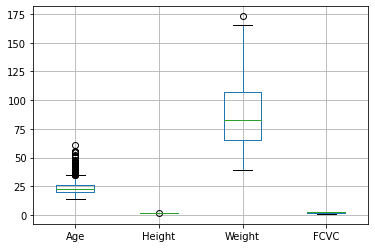

In [152]:
boxplot = df_obesity.boxplot(column=['Age', 'Height', 'Weight','FCVC'])

+ **Correlación entre las variables** 

In [10]:
corr = df_obesity.corr()
corr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


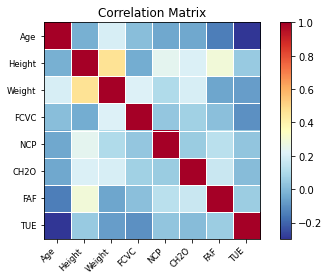

In [11]:
corr = df_obesity.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# **Variables Cualitativas**

+ **Gender** / Genero

In [12]:
df_obesity['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [ ]:
plot = (100 * df_obesity['Gender'].value_counts() / len(df_obesity['Gender'])).plot(
kind='bar', title='Genero %')
plt.legend()

In [ ]:
plot = df_obesity['Gender'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Genero')

Dentro de la base de datos se cuentan con **1043 mujeres** y **1068 hombres**, siendo el 49.41% y 50.59% respectivamente de la población. 

+ **family_history_with_overweight** / Antecedentes

In [15]:
df_obesity['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

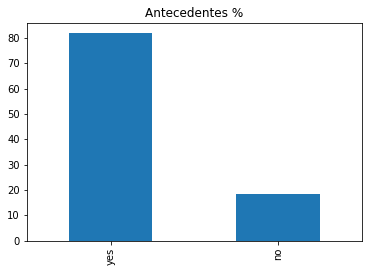

In [19]:
plot = (100 * df_obesity['family_history_with_overweight'].value_counts() / len(df_obesity['family_history_with_overweight'])).plot(
kind='bar', title='Antecedentes %')

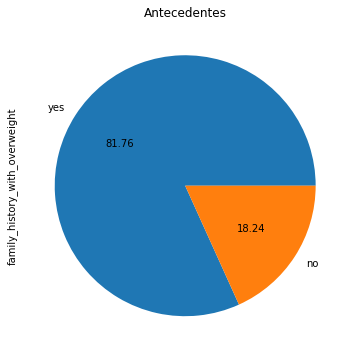

In [20]:
plot = df_obesity['family_history_with_overweight'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Antecedentes')

El **81.76%** de la poblacion indica tener antecedentes de familiares con sobrepeso. 

+ **FAVC** / Consumo frecuente de alimentos ricos en calorías

In [21]:
df_obesity['FAVC'].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

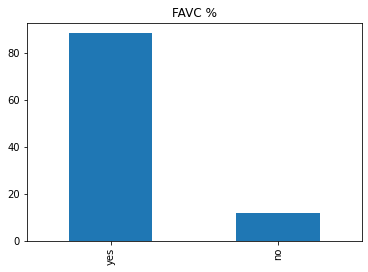

In [23]:
plot = (100 * df_obesity['FAVC'].value_counts() / len(df_obesity['FAVC'])).plot(
kind='bar', title='FAVC %')

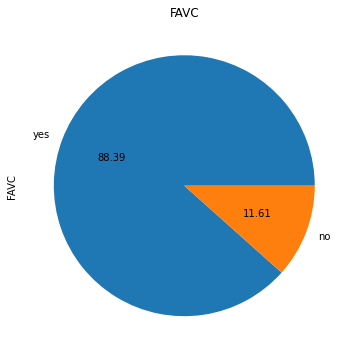

In [24]:
plot = df_obesity['FAVC'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='FAVC')

El **88.39%** de la población indica que consume frecuentemente alimentos ricos en calorías

+ **CAEC** / Consumo de alimentos entre comidas

In [26]:
df_obesity['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

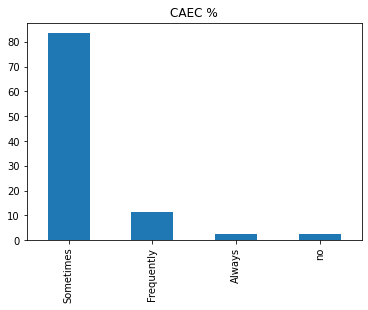

In [27]:
plot = (100 * df_obesity['CAEC'].value_counts() / len(df_obesity['CAEC'])).plot(
kind='bar', title='CAEC %')

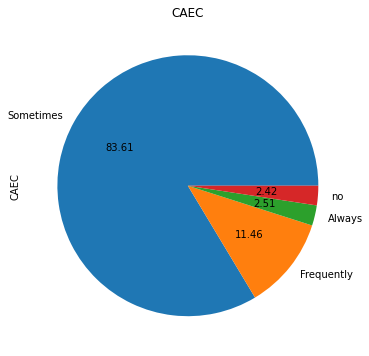

In [28]:
plot = df_obesity['CAEC'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='CAEC')

El **83.61%** de la población indica que consume alimentos entre comidas algunas veces y el **11.46%** frecuentemente. 

+ **SMOKE** /  

In [ ]:
df_obesity['SMOKE'].value_counts()

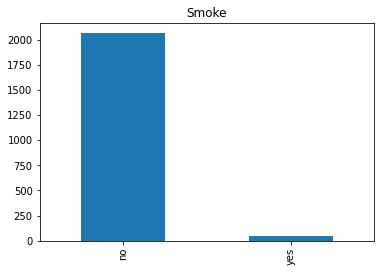

In [29]:
plot = df_obesity['SMOKE'].value_counts().plot(kind='bar',
                                            title='Smoke')

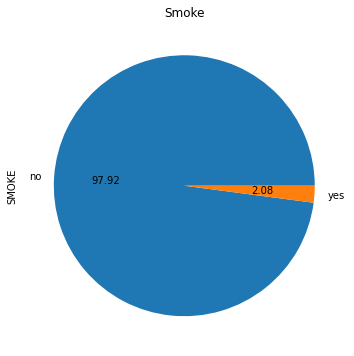

In [31]:
plot = df_obesity['SMOKE'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Smoke')

El **97.92%** de la población indica que no fuma 

+ **SCC** / Monitoreo del consumo de calorías

In [ ]:
df_obesity['SCC'].value_counts()

In [ ]:
plot = (100 * df_obesity['SCC'].value_counts() / len(df_obesity['SCC'])).plot(
kind='bar', title='SCC %')

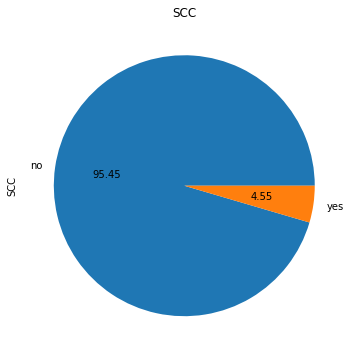

In [35]:
plot = df_obesity['SCC'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='SCC')

El **95.45%** de la población indica no tener monitoreo en el consumo de calorias. 

+ **CALC** / Consumo de alcohol

In [36]:
df_obesity['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

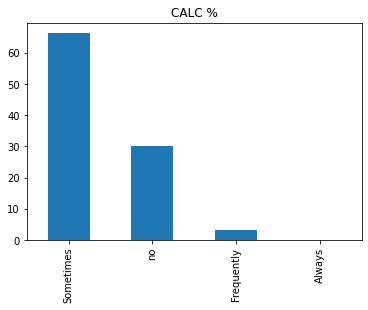

In [38]:
plot = (100 * df_obesity['CALC'].value_counts() / len(df_obesity['CALC'])).plot(
kind='bar', title='CALC %')

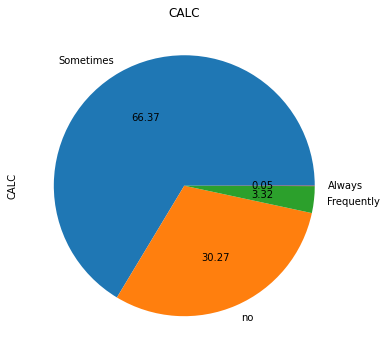

In [39]:
plot = df_obesity['CALC'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='CALC')

Algunas veces el **66.37%** de la población consume alcohol, mientras que el **30.27%** indica no consumir alcohol. 

+ **MTRANS** / Transporte usado

In [40]:
df_obesity['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

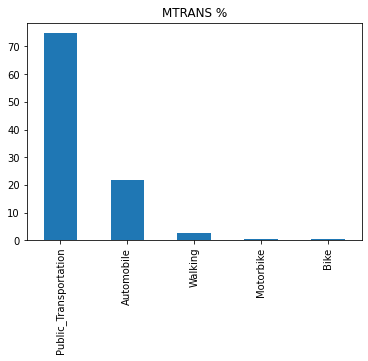

In [42]:
plot = (100 * df_obesity['MTRANS'].value_counts() / len(df_obesity['MTRANS'])).plot(
kind='bar', title='MTRANS %')

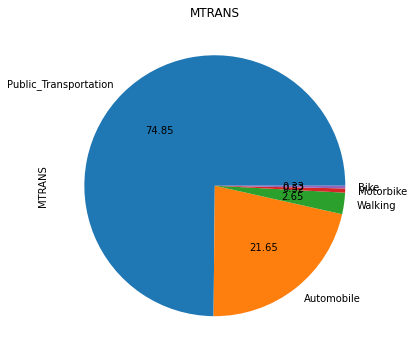

In [43]:
plot = df_obesity['MTRANS'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='MTRANS')

El **74.85%** de la población usa transporte público, mientras que el **21.65%** usa automovil. 

+ **NObeyesdad** / 

In [51]:
df_obesity['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [ ]:
plot = (100 * df_obesity['NObeyesdad'].value_counts() / len(df_obesity['NObeyesdad'])).plot(
kind='bar', title='NObeyesdad %')

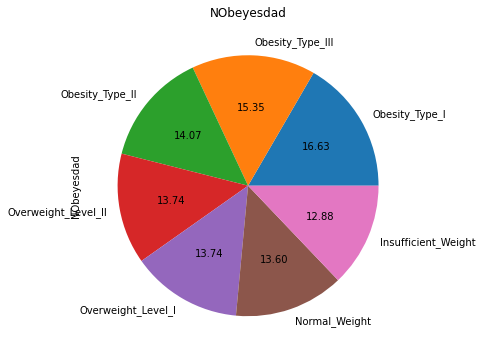

In [48]:
plot = df_obesity['NObeyesdad'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='NObeyesdad')

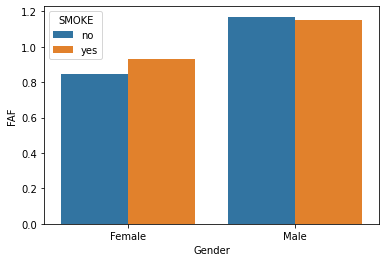

In [81]:
sns.barplot(data = df_obesity,
            estimator = mean,
            y = "FAF",
            x = "Gender", 
            hue = "SMOKE",
            ci = None)

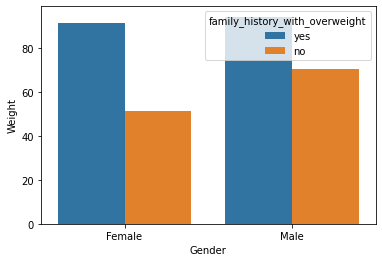

In [95]:
sns.barplot(data = df_obesity,
            estimator = mean,
            y = "Weight",
            x = "Gender", 
            hue = "family_history_with_overweight",
            ci = None)

De las mujeres, las que presentan antecedentes familiares con sobrepeso, en promedio son las que pesan más al igual que pasa con los hombres. 

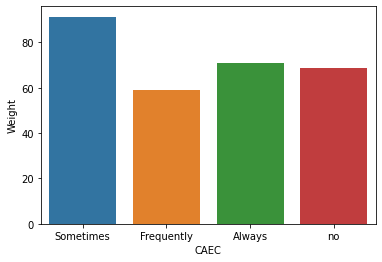

In [97]:
sns.barplot(data = df_obesity,
            estimator = mean,
            y = "Weight",
            x = "CAEC",
            ci = None)

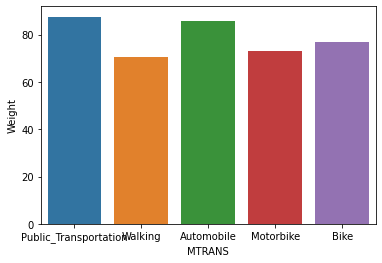

In [101]:
sns.barplot(data = df_obesity,
            y = "Weight",
            x = "MTRANS",
            ci = None)

Al observar esta grafica podemos ver que si se ve el peso contra el medio de transporte, las personas que toman autobus o carro son los que pueden llegar a tener mayor peso.

In [115]:
bars = alt.Chart(df_obesity).mark_bar().encode(
    y=alt.Y('MTRANS:N'),
    x=alt.X('mean(Weight):Q',
            stack = "normalize"),
    color=alt.Color('Gender')
)
text = alt.Chart(df_obesity).mark_text(dx=-50, dy=0, color='black',size = 8).encode(
    y=alt.Y('MTRANS:N'),
    x=alt.X('mean(Weight):Q',
            stack='normalize'),
    detail='Gender:N',
    text=alt.Text('mean(Weight):Q', format='.1f')
)
chart = bars + text
chart.properties(
    width=450,
    height=200
)

alt.LayerChart(...)

Al observar la gráfica se puede decir que el peso promedio de las mujeres que usan automovil es de 73.6 Kg mientras que el de los hombres que usan automovil es de 92.9 Kg

Del mismo modo si observamos el medio de transporte "caminar" el promedio del peso de las mujeres que caminan con 60.5 Kg es menor que el promedio del peso de las mujeres que usan el automovil, del mismo modo pasa con el sexo masculino.

Lo que nos puede llevar a pesar que si se usa el automovil como medio de transporte común puede estar relacionado con pesos grandes. Dicha relación se verificara más adelante.

## **Referencia**

+ Palechor, FM y de la Hoz Manotas, A. (2019). Conjunto de datos para la estimación de los niveles de obesidad en función de los hábitos alimentarios y la condición física en individuos de Colombia, Perú y México. Datos resumidos, 104344.